In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import logging
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [58]:
set_len = 50
city_set = []

range(len(cities))

for x in range(0, len(cities), set_len):
    city_set.append(cities[x:x+set_len])

print(city_set[0])


['bambous virieux', 'ballina', 'chinhoyi', 'busselton', 'bluff', 'rikitea', 'semnan', 'hobart', 'port alfred', 'port lincoln', 'qaanaaq', 'jamestown', 'guiyang', 'vaini', 'ahipara', 'tumannyy', 'hit', 'east london', 'makurdi', 'villablino', 'orlik', 'cape town', 'new norfolk', 'portland', 'acapulco', 'mataura', 'salalah', 'yellowknife', 'bereda', 'voznesenye', 'mahebourg', 'atuona', 'thompson', 'bulawayo', 'hilo', 'butaritari', 'kloulklubed', 'nemuro', 'ushuaia', 'cartagena del chaira', 'winnemucca', 'boguchany', 'esik', 'camacha', 'eskasem', 'ylojarvi', 'albany', 'attawapiskat', 'provideniya', 'tapaua']


In [68]:
city_name = []
for i in range(len(city_set)):
    for city in city_set[i]:
        city_name.append(city)

print(city_name)

['bambous virieux', 'ballina', 'chinhoyi', 'busselton', 'bluff', 'rikitea', 'semnan', 'hobart', 'port alfred', 'port lincoln', 'qaanaaq', 'jamestown', 'guiyang', 'vaini', 'ahipara', 'tumannyy', 'hit', 'east london', 'makurdi', 'villablino', 'orlik', 'cape town', 'new norfolk', 'portland', 'acapulco', 'mataura', 'salalah', 'yellowknife', 'bereda', 'voznesenye', 'mahebourg', 'atuona', 'thompson', 'bulawayo', 'hilo', 'butaritari', 'kloulklubed', 'nemuro', 'ushuaia', 'cartagena del chaira', 'winnemucca', 'boguchany', 'esik', 'camacha', 'eskasem', 'ylojarvi', 'albany', 'attawapiskat', 'provideniya', 'tapaua', 'punta arenas', 'bethel', 'lebu', 'kavieng', 'hastings', 'bunia', 'faya', 'dalvik', 'bijie', 'port hedland', 'curuguaty', 'akdepe', 'illoqqortoormiut', 'kutum', 'bredasdorp', 'holme', 'bristol', 'pierre', 'norman wells', 'talara', 'gorontalo', 'toliary', 'saint-joseph', 'nizhneyansk', 'hermanus', 'labuan', 'aripuana', 'taolanaro', 'saint anthony', 'mys shmidta', 'georgetown', 'vila do 

In [22]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

In [43]:
sample = "New York"
response = requests.get(f"{url}appid={weather_api_key}&units={units}&q={sample}").json()
print(json.dumps(response, indent=4))

{
    "coord": {
        "lon": -74.006,
        "lat": 40.7143
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 74.08,
        "feels_like": 74.3,
        "temp_min": 69.51,
        "temp_max": 76.08,
        "pressure": 1016,
        "humidity": 66
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.01,
        "deg": 84,
        "gust": 3
    },
    "clouds": {
        "all": 1
    },
    "dt": 1627185798,
    "sys": {
        "type": 2,
        "id": 2039034,
        "country": "US",
        "sunrise": 1627206376,
        "sunset": 1627258712
    },
    "timezone": -14400,
    "id": 5128581,
    "name": "New York",
    "cod": 200
}


In [ ]:
'''lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []

for city in cities:
    response = requests.get(query_url + city).json()
    print(json.dumps(response, indent=4, sort_keys='True'))'''

In [25]:
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
city_id = []
date = []
cities_1 = ["New York", "Paris", "Tokyo", "Mumbai"]

for city in cities_1:
    #response = requests.get(f"{url}appid={weather_api_key}&units={units}&q={city}").json()
    lat.append(response["coord"]["lat"])
    lon.append(response["coord"]["lon"])
    max_temp.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    cloudiness.append(response["clouds"]["all"])
    wind_speed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    city_id.append(response["id"])
    date.append(response["dt"])


In [83]:
cities_weather_df = pd.DataFrame({"City": cities_1,
                               "Lat": lat, 
                               "Lng": lon, 
                               "Max Temp": max_temp, 
                               "Humidity": humidity, 
                               "Cloudiness": cloudiness, 
                               "Wind Speed": wind_speed, 
                               "Country": country, 
                               "Date": date})
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New York,40.7143,-74.0060,76.05,68,1,1.01,US,1627185293
1,Paris,48.8534,2.3488,65.77,88,90,1.01,FR,1627185130
2,Tokyo,35.6895,139.6917,95.52,46,20,3.00,JP,1627185337
3,Mumbai,19.0144,72.8479,84.18,89,75,8.05,IN,1627185279


In [39]:
cities_weather_df.to_csv(output_data_file)

In [44]:
cities_weather_stats = cities_weather_df.describe()
cities_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00
mean,36.067900,35.220600,80.380000,72.750000,46.500000,3.267500,1.627185e+09
std,12.596601,91.907616,12.594451,20.287517,42.727821,3.323476,8.996064e+01
min,19.014400,-74.006000,65.770000,46.000000,1.000000,1.010000,1.627185e+09
25%,31.520725,-16.739900,73.480000,62.500000,15.250000,1.010000,1.627185e+09
50%,38.201900,37.598350,80.115000,78.000000,47.500000,2.005000,1.627185e+09
75%,42.749075,89.558850,87.015000,88.250000,78.750000,4.262500,1.627185e+09
max,48.853400,139.691700,95.520000,89.000000,90.000000,8.050000,1.627185e+09


In [88]:
humidity_outliers = cities_weather_df.loc[cities_weather_df["Humidity"] > 80]
humidity_outliers.index

Int64Index([1, 3], dtype='int64')

In [89]:
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New York,40.7143,-74.0060,76.05,68,1,1.01,US,1627185293
1,Paris,48.8534,2.3488,65.77,88,90,1.01,FR,1627185130
2,Tokyo,35.6895,139.6917,95.52,46,20,3.00,JP,1627185337
3,Mumbai,19.0144,72.8479,84.18,89,75,8.05,IN,1627185279


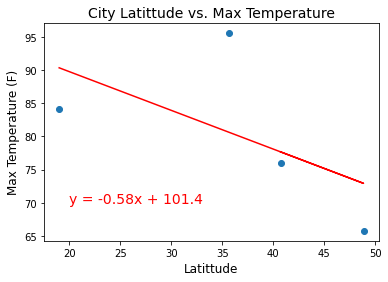

In [93]:
# Finding Linear Regression for Effective Field Goal and Winning Percentage
x_axis = cities_weather_df["Lat"]
y_axis = cities_weather_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_axis,y_axis)

# Line equation to find Predcited winning percentages
regress_value = slope*x_axis + intercept

# Line equation to print on the scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot of Effective Field Goal against winning%
plt.scatter(x_axis, y_axis)

# Line plot for regerssion line
plt.plot(x_axis,regress_value, "r-")

# Display regression line
plt.annotate(line_eq,(20,70), fontsize=14, color="red")

# Labels and Titles for the plot
plt.xlabel("Latittude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title("City Latittude vs. Max Temperature", fontsize=14)

# Saving scatter plot graph into visualization folder
#plt.savefig("Visualizations/EffectiveFieldGoal.jpg")

# Display plot
plt.show()